#Основные понятия  
**Генерация признаков (Feature Engineering):**

- Важность признаков: Признаки являются входными данными для модели машинного обучения и играют ключевую роль в ее производительности.
- Создание новых признаков: Процесс создания новых признаков из существующих данных с помощью различных методов, таких как разделение, объединение, преобразование и т.д.
- Типы признаков: Числовые (непрерывные и дискретные), категориальные, текстовые, изображения и др.

**Методы отбора признаков (Feature Selection):**

- Фильтрация признаков: Методы, основанные на статистических показателях, таких как корреляция, дисперсия, взаимная информация и т.д.
- Обертка (Wrapper): Методы, использующие саму модель машинного обучения для оценки подмножеств признаков (прямой или обратный отбор признаков).
- Внедренный отбор (Embedded): Методы, совмещающие процесс обучения модели и отбора признаков (например, LASSO, Ridge).  

**Подбор гиперпараметров (Hyperparameter Tuning):**

- Гиперпараметры: Параметры, задаваемые перед обучением модели и влияющие на процесс обучения и производительность модели.
- Перекрестная проверка: Используется для оценки производительности модели при различных значениях гиперпараметров.
- Методы подбора: Сетка параметров (Grid Search), случайный поиск (Random Search), байесовская оптимизация (Bayesian Optimization) и др.

In [3]:
! wget https://raw.githubusercontent.com/RShoose/Data/main/ds_salaries.csv

--2024-12-22 22:02:18--  https://raw.githubusercontent.com/RShoose/Data/main/ds_salaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210076 (205K) [text/plain]
Saving to: ‘ds_salaries.csv.1’

ds_salaries.csv.1   100%[===================>] 205.15K  --.-KB/s    in 0.04s   

2024-12-22 22:02:18 (5.59 MB/s) - ‘ds_salaries.csv.1’ saved [210076/210076]



# Данные
Сегодня мы поработаем с  данными о зарплатах в сфере data science. Он содержит записи о работниках, их опыте, типе занятости, уровне удаленной работы, зарплатах и других характеристиках.



In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RShoose/Data/main/ds_salaries.csv')

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Датасет состоит из 3755 записей (строк) и включает 11 признаков (столбцов). Давайте разберем каждый признак:

---

### Описание признаков:
1. `work_year` (тип: int64)  
   - Год, в котором сотрудник работал.  


2. `experience_level` (тип: object)  
   - Уровень опыта сотрудника.  

3. `employment_type` (тип: object)  
   - Тип занятости.  


4. `job_title` (тип: object)  
   - Должность сотрудника (название роли).  
  
5. `salary` (тип: int64)  
   - Зарплата сотрудника (в валюте, указанной в столбце `salary_currency`).  

6. `salary_currency` (тип: object)  
   - Валюта, в которой указана зарплата.  
   

7. `salary_in_usd` (тип: int64)  
   - Зарплата сотрудника, конвертированная в доллары США.  
  

8. `employee_residence` (тип: object)  
   - Местоположение сотрудника (страна резиденции).  
   

9. `remote_ratio` (тип: int64)  
   - Уровень удаленной работы (%) — доля удаленной работы в общем рабочем времени.  
  

10. `company_location` (тип: object)  
    - Местоположение офиса компании (страна).  
    
11. `company_size` (тип: object)  
    - Размер компании по числу сотрудников.  
   


`salary` и `salary_currency`:  
Эти признаки будут удалены по следующим причинам:
  - избыточность данных (повторяющаяся информация):  
  Столбец `salary` (зарплата) и `salary_currency` (валюта) уже дублируются через колонку `salary_in_usd` (зарплата, выраженная в долларах США).  
  - `salary_in_usd` удобен для анализа, потому что он позволяет сравнивать зарплаты сотрудников без привязки к разным валютам, что упрощает обработку данных.


`employment_type`:
- Фокус на других признаках:  
  Этот столбец связан с типом занятости (`FT`, `PT`, и т.д.), однако он мог считаться менее релевантным для конкретного анализа. Например:
    - если мы хотим сосредоточиться на зарплатах, опыте, удаленной работе или размере компании, `employment_type` не будет напрямую влиять на анализ.
    - тип занятости (полная/частичная/контрактная работа) мог быть не связующим фактором, так как ключевая информация уже представлена уровнем опыта (`experience_level`), удалённостью работы (`remote_ratio`) и зарплатой.

`employee_residence`:  
Удаление этого столбца по следующими причинами:
- упрощение географического анализа:  
  Пока сотрудник может проживать в одной стране (`employee_residence`), компания может быть зарегистрирована в другой стране (`company_location`). Например, удалённый сотрудник, проживающий в Индии, может работать на компанию, базирующуюся в США.  
  - если фокус анализа направлен на компанию и ее местоположение, то информация о месте проживания сотрудника становится избыточной.
  - для целей исследования решено, что `company_location` (локация компании) важнее, чем место проживания сотрудника.

In [7]:
df.drop(['salary', 'salary_currency', 'employment_type', 'employee_residence'], axis=1, inplace=True)

KeyError: "['salary', 'salary_currency', 'employment_type', 'employee_residence'] not found in axis"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   job_title         3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_location  3755 non-null   object
 6   company_size      3755 non-null   object
dtypes: int64(3), object(4)
memory usage: 205.5+ KB


Рассмотрим распределение категориальных признаков

In [10]:
df['work_year'].value_counts()

,count
work_year,
2023,1785
2022,1664
2021,230
2020,76


Данные представлены за 2020 - 2023 г.

In [11]:
df['remote_ratio'].value_counts()

,count
remote_ratio,
0,1923
100,1643
50,189


Всего 3 категории с неравномерным распределением:
- `0` (работа без удалённой занятости): 1923 записи.
- `100` (полностью удалённая занятость): 1643 записи.
- `50` (гибридный формат, частично удалённая занятость): 189 записей.

In [12]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
...,...
Principal Machine Learning Engineer,1
Azure Data Engineer,1
Manager Data Management,1


Категорий очень много, многие пересекаются, поэтому, стоит этот признак обработать.

In [10]:
unique_job_titles = df['job_title'].unique().tolist()
unique_job_titles

['Principal Data Scientist',
 'ML Engineer',
 'Data Scientist',
 'Applied Scientist',
 'Data Analyst',
 'Data Modeler',
 'Research Engineer',
 'Analytics Engineer',
 'Business Intelligence Engineer',
 'Machine Learning Engineer',
 'Data Strategist',
 'Data Engineer',
 'Computer Vision Engineer',
 'Data Quality Analyst',
 'Compliance Data Analyst',
 'Data Architect',
 'Applied Machine Learning Engineer',
 'AI Developer',
 'Research Scientist',
 'Data Analytics Manager',
 'Business Data Analyst',
 'Applied Data Scientist',
 'Staff Data Analyst',
 'ETL Engineer',
 'Data DevOps Engineer',
 'Head of Data',
 'Data Science Manager',
 'Data Manager',
 'Machine Learning Researcher',
 'Big Data Engineer',
 'Data Specialist',
 'Lead Data Analyst',
 'BI Data Engineer',
 'Director of Data Science',
 'Machine Learning Scientist',
 'MLOps Engineer',
 'AI Scientist',
 'Autonomous Vehicle Technician',
 'Applied Machine Learning Scientist',
 'Lead Data Scientist',
 'Cloud Database Engineer',
 'Financial

Уменьшим количество категорий, и похожие категории объединим в одну

In [17]:
df['job_title'].isin(titles), 'job_category'

(0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 3750    False
 3751    False
 3752    False
 3753    False
 3754    False
 Name: job_title, Length: 3755, dtype: bool,
 'job_category')

In [26]:
job_categories = {
    'Data Scientist': ['Data Scientist', 'Applied Data Scientist', 'Data Scientist Lead'],
    'Machine Learning Engineer': ['ML Engineer', 'Machine Learning Researcher', 'Lead Machine Learning Engineer'],
    'Data Analyst': ['Data Analyst', 'Business Data Analyst', 'Marketing Data Analyst'],
    'Data Engineer': ['Data Engineer', 'Big Data Engineer', 'Lead Data Engineer'],
    'Research Scientist': ['Research Scientist', 'ML Researcher', 'Deep Learning Researcher'],
    'Manager': ['Data Analytics Manager', 'Head of Data', 'Machine Learning Manager'],
    'Engineer': ['Software Data Engineer', 'Data DevOps Engineer', 'Cloud Database Engineer'],
    'AI Specialist': ['AI Developer', 'AI Scientist', 'AI Programmer'],
    'Architect': ['Data Architect', 'Big Data Architect', 'Cloud Data Architect']
}

for category, titles in job_categories.items():
    print('1', category, '\n', '2',titles)

1 Data Scientist 
 2 ['Data Scientist', 'Applied Data Scientist', 'Data Scientist Lead']
1 Machine Learning Engineer 
 2 ['ML Engineer', 'Machine Learning Researcher', 'Lead Machine Learning Engineer']
1 Data Analyst 
 2 ['Data Analyst', 'Business Data Analyst', 'Marketing Data Analyst']
1 Data Engineer 
 2 ['Data Engineer', 'Big Data Engineer', 'Lead Data Engineer']
1 Research Scientist 
 2 ['Research Scientist', 'ML Researcher', 'Deep Learning Researcher']
1 Manager 
 2 ['Data Analytics Manager', 'Head of Data', 'Machine Learning Manager']
1 Engineer 
 2 ['Software Data Engineer', 'Data DevOps Engineer', 'Cloud Database Engineer']
1 AI Specialist 
 2 ['AI Developer', 'AI Scientist', 'AI Programmer']
1 Architect 
 2 ['Data Architect', 'Big Data Architect', 'Cloud Data Architect']


In [11]:
job_categories = {
    'Data Scientist': ['Data Scientist', 'Applied Data Scientist', 'Data Scientist Lead'],
    'Machine Learning Engineer': ['ML Engineer', 'Machine Learning Researcher', 'Lead Machine Learning Engineer'],
    'Data Analyst': ['Data Analyst', 'Business Data Analyst', 'Marketing Data Analyst'],
    'Data Engineer': ['Data Engineer', 'Big Data Engineer', 'Lead Data Engineer'],
    'Research Scientist': ['Research Scientist', 'ML Researcher', 'Deep Learning Researcher'],
    'Manager': ['Data Analytics Manager', 'Head of Data', 'Machine Learning Manager'],
    'Engineer': ['Software Data Engineer', 'Data DevOps Engineer', 'Cloud Database Engineer'],
    'AI Specialist': ['AI Developer', 'AI Scientist', 'AI Programmer'],
    'Architect': ['Data Architect', 'Big Data Architect', 'Cloud Data Architect']
}

# Создаем новый столбец `job_category`
df['job_category'] = 'Other'  # Значение по умолчанию для тех профессий, которые не попали в список

for category, titles in job_categories.items():
    df.loc[df['job_title'].isin(titles), 'job_category'] = category

print(df[['job_title', 'job_category']].head())

                  job_title               job_category
0  Principal Data Scientist                      Other
1               ML Engineer  Machine Learning Engineer
2               ML Engineer  Machine Learning Engineer
3            Data Scientist             Data Scientist
4            Data Scientist             Data Scientist


Количество категорий уменьшилось, но все равно использовать уже известные нам способы  кодирования категориальных признаков, не лучшее решение.

In [15]:
df['job_category'].value_counts()

,count
job_category,
Data Engineer,1057
Other,915
Data Scientist,852
Data Analyst,629
Architect,104
Research Scientist,83
Machine Learning Engineer,43
Manager,35
AI Specialist,29


Есть несколько вариантов преобразовать текст в численное представление

Мешок слов (Bag of Words, BoW) — это простая и популярная методика для представления текстовых данных в формате, удобном для машинного обучения. Она используется, например, в задачах классификации текста, анализа тональности, тематического моделирования и других задач обработки естественного языка (NLP).

### Концепция
Основная идея заключается в том, что текст представляет собой "мешок" слов: мы игнорируем порядок слов, грамматику и любые синтаксические связи, фокусируясь только на частоте или наличии слов в тексте.

### Шаги построения "мешка слов":
1. Сбор текстов: соберите корпус документов (текстов) для анализа.
2. Очистка текста: обычно удаляются:
   - лишние символы (знаки препинания, специальные символы);
   - стоп-слова (частозустрічаемые, но малоинформативные слова вроде "и", "на", "в").
   Также можно применять приведение слов к нормальной форме (например, к леммам или основам), чтобы "бегу" и "бежать" рассматривались как одно слово.
3. Создание словаря (векторов):
   - Собирается список всех уникальных слов из корпуса.
   - Каждому слову назначается индекс, и создаётся словарь (термин-матрица).
4. Кодирование текста в вектор:
   - Каждый документ представляется вектором, размер которого соответствует количеству уникальных слов в словаре.
   - Вектор заполняется либо частотой слов, либо просто значением (0 — слово отсутствует, 1 — слово присутствует).

### Пример
Скажем, у вас есть два текста:
1. "Кот любит молоко."
2. "Собака любит игрушки."

1. Уникальный словарь: ["Кот", "любит", "молоко", "Собака", "игрушки"]
2. Векторизация:
   - Для первого текста: [1, 1, 1, 0, 0] (Кот, любит, молоко — есть в тексте, Собака, игрушки — отсутствуют)
   - Для второго текста: [0, 1, 0, 1, 1]

Таким образом, тексты преобразованы в числовой вид.


![image](https://cf2.ppt-online.org/files2/slide/1/1LvqNZQKUYfhaVRnSCXox6Pp9Wb4Gu2dHk78EDw3sm/slide-11.jpg)

### Недостатки:
1. Потеря порядка слов: Словарь воспринимает текст как "мешок", без учета последовательности слов, из-за чего важный контекст может быть утерян.
2. Размерность: Если корпус содержит много уникальных слов, размерность векторов будет огромной (проблема разреженности данных).
3. Не различает синонимы и омонимы: Например, слова "бег" и "прыжок" воспринимаются как разные слова, хотя они могут выражать схожие идеи.
4. Чувствительность к шуму: Редкие слова или опечатки могут привести к увеличению размерности, создавая "лишний" шум.

### Альтернативы:
- TF-IDF (Term Frequency-Inverse Document Frequency): улучшение мешка слов, которое учитывает частоту слова в конкретном тексте и его редкость в корпусе.

**TF-IDF (Term Frequency-Inverse Document Frequency)** — это метод, используемый в обработке естественного языка (NLP) и информационном поиске для оценки важности определенного слова в одном документе относительно всего корпуса документов. Это более продвинутая техника, чем "мешок слов", и она основывается на частотном анализе текста.

### Алгоритм TF-IDF
TF-IDF состоит из двух основных компонентов:

1. **TF (Term Frequency, частота термина):**
   - Это мера того, насколько часто слово встречается в конкретном документе.
   - Рассчитывается по формуле:

   \[
   TF(w) = \frac{\text{Количество вхождений слова } w \text{ в документ}}{\text{Общее количество слов в документе}}
   \]

   Например, если слово "машина" встречается 3 раза в документе из 100 слов, его **TF** будет равно \( \frac{3}{100} = 0.03 \).

---

2. **IDF (Inverse Document Frequency, обратная частота документа):**
   - Это мера, показывающая важность слова в целом для всех документов. Слова, которые встречаются чаще (например, "и", "на"), получают меньший вес, так как они менее информативны. А редкие слова получают больший вес.
   - Рассчитывается по формуле:

$$
   IDF(w) = \log\left(\frac{N}{1 + DF(w)}\right)
$$
   где:
   - \( N \) — общее количество документов в корпусе.
   - \( DF(w) \) — количество документов, в которых встречается слово \( w \).
   - \( +1 \) добавляется в знаменатель, чтобы избежать деления на ноль (если слово отсутствует в документах).

---

3. **TF-IDF:**
   - Наконец, TF-IDF достигается умножением двух величин:
   \[
   TF\text{-}IDF(w) = TF(w) \times IDF(w)
   \]

   Это даёт числовую оценку важности слова \( w \) в конкретном документе относительно всего корпуса.

---

### Пример
Предположим, у нас есть три документа:
1. Документ №1: "Кот любит молоко".
2. Документ №2: "Собака любит косточку".
3. Документ №3: "Молоко любят все".

Общий корпус состоит из: [Кот, любит, молоко, Собака, любит, косточку, Молоко, любят, все].

1. **TF (Частота термина):**
   - В документе №1 "молоко" встречается 1 раз, всего в документе 3 слова. Тогда:
$$
     TF("молоко") = \frac{1}{3} \approx 0.33
$$
   - Аналогично для других слов.

2. **IDF (Обратная частота документа):**
   - Слово "молоко" встречается в 2 из 3 документов (\(df = 2\)).
 $$
     IDF("молоко") = \log\left(\frac{3}{1 + 2}\right) = \log(1) = 0
$$
     То есть его значение будет снижено, так как оно часто встречается в корпусе.
   - Редкое слово "косточку" встречается только в одном документе (\(df = 1\)):
$$
     IDF("косточку") = \log\left(\frac{3}{1 + 1}\right) = \log(1.5) \approx 0.41
$$

3. **TF-IDF:**
   - Умножаем \(TF\) на \(IDF\) для каждого слова:
     Например, для слова "молоко" в документе №1:
$$
     TF\text{-}IDF("молоко") = 0.33 \times 0 = 0
$$
     Для редкого слова "косточку" в документе №2:
$$
     TF\text{-}IDF("косточку") = 0.33 \times 0.41 \approx 0.14
$$

---

### Применение
1. **Текстовая классификация:** Использование TF-IDF в качестве признаков для машинного обучения (например, классификации писем на "спам" и "не спам").
2. **Информационный поиск:** Поиск по тексту, где важные слова документа сравниваются с запросами на основе TF-IDF.
3. **Кластеризация текста:** Создание векторного представления текста для использования в алгоритмах кластеризации.

---

### Преимущества:
1. Простота реализации.
2. Эффективно снижает вес "шумовых" слов, которые появляются часто, но содержат мало информации.
3. Хорошо работает для задач, где важны редкие уникальные слова.

---

### Недостатки:
1. **Слабый учёт позиции:** TF-IDF полностью игнорирует порядок слов.
2. **Не учитывает отношения слов:** Не понимает связи между словами в предложении (например, "хороший фильм" и "фильм хороший" для него одно и то же).
3. **Чувствительность к большим корпусам:** Для больших объемов текста метод может стать ресурсоемким.
4. **Синонимы:** TF-IDF наивно рассматривает синонимы как разные слова.

---

TF-IDF часто используется как основа в традиционном машинном обучении и до сих пор остается важным инструментом для анализа текстов.

![image](https://mypresentation.ru/documents/29b3a52d27bd1919baf8c3cbcc1ad7b2/004.jpg)

![image](https://habrastorage.org/webt/ns/yf/-l/nsyf-lljlfb0r7bjrc_l3xonto0.jpeg)

In [27]:
df['job_category']

0                           Other
1       Machine Learning Engineer
2       Machine Learning Engineer
3                  Data Scientist
4                  Data Scientist
                  ...            
3750               Data Scientist
3751                        Other
3752               Data Scientist
3753                 Data Analyst
3754                        Other
Name: job_category, Length: 3755, dtype: object

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание экземпляра TfidfVectorizer
vectorizer = TfidfVectorizer()

# Преобразование документов в TF-IDF векторы
tfidf_matrix = vectorizer.fit_transform(df['job_category'])
# Просмотр результатов
print(tfidf_matrix)

# Для получения словаря терминов
print(vectorizer.get_feature_names_out())

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6491 stored elements and shape (3755, 12)>
  Coords	Values
  (0, 8)	1.0
  (1, 6)	0.6794554655569369
  (1, 5)	0.6794554655569369
  (1, 4)	0.27691251443301046
  (2, 6)	0.6794554655569369
  (2, 5)	0.6794554655569369
  (2, 4)	0.27691251443301046
  (3, 3)	0.50325368407339
  (3, 10)	0.8641387211938606
  (4, 3)	0.50325368407339
  (4, 10)	0.8641387211938606
  (5, 8)	1.0
  (6, 8)	1.0
  (7, 3)	0.50325368407339
  (7, 10)	0.8641387211938606
  (8, 3)	0.50325368407339
  (8, 10)	0.8641387211938606
  (9, 3)	0.50325368407339
  (9, 10)	0.8641387211938606
  (10, 3)	0.50325368407339
  (10, 10)	0.8641387211938606
  (11, 3)	0.4469281850243177
  (11, 1)	0.8945698393255103
  (12, 3)	0.4469281850243177
  (12, 1)	0.8945698393255103
  :	:
  (3739, 4)	0.8472857565958778
  (3739, 3)	0.5311373143262965
  (3740, 8)	1.0
  (3741, 3)	0.50325368407339
  (3741, 10)	0.8641387211938606
  (3742, 3)	0.50325368407339
  (3742, 10)	0.8641387211938606
  (3743, 4)	0.84

In [30]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Конкатенируем исходный DataFrame с новым DataFrame векторов TF-IDF
df = pd.concat([df, tfidf_df], axis=1).drop('job_category', axis=1)

In [31]:
df.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist
0,2023,SE,Principal Data Scientist,85847,100,ES,L,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
1,2023,MI,ML Engineer,30000,100,US,S,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0
2,2023,MI,ML Engineer,25500,100,US,S,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0
3,2023,SE,Data Scientist,175000,100,CA,M,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0
4,2023,SE,Data Scientist,120000,100,CA,M,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0


Как еще один вариант кодировки и как следствие генерации новых признаков

Применим Label кодировку для 2-х следующих признаков

In [32]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

- SE (Senior): 2516 записей
- MI (Mid-level): 805 записей
- EN (Entry-level): 320 записей
- EX (Executive): 114 записей

- EN (Entry Level) - начальный уровень опыта работы. Это может быть для людей, только начинающих свою карьеру или имеющих минимальный опыт работы в данной области.

- EX (Executive Level) - высокий уровень опыта работы. Это обусловлено тем, что в данном случае количество участников с уровнем опыта EX значительно меньше, что указывает на более высокий и специализированный уровень работы.

In [33]:
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [41]:
selected_columns = df.loc[:, ['company_size', 'experience_level']]
selected_columns

,company_size,experience_level
0,L,SE
1,S,MI
2,S,MI
3,M,SE
4,M,SE
...,...,...
3750,L,SE
3751,L,MI
3752,S,EN
3753,L,EN


In [42]:
from sklearn.preprocessing import LabelEncoder
selected_columns = df.loc[:, ['company_size', 'experience_level']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in selected_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Вывод DataFrame
display(df)

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,ai,analyst,architect,...,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded
0,2023,SE,Principal Data Scientist,85847,100,ES,L,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3
1,2023,MI,ML Engineer,30000,100,US,S,0.0,0.00000,0.0,...,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2
2,2023,MI,ML Engineer,25500,100,US,S,0.0,0.00000,0.0,...,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2
3,2023,SE,Data Scientist,175000,100,CA,M,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3
4,2023,SE,Data Scientist,120000,100,CA,M,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,Data Scientist,412000,100,US,L,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,0,3
3751,2021,MI,Principal Data Scientist,151000,100,US,L,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,2
3752,2020,EN,Data Scientist,105000,100,US,S,0.0,0.00000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,2,0
3753,2020,EN,Business Data Analyst,100000,100,US,L,0.0,0.89457,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0


Кодировка для company_size: {'L': np.int64(0), 'M': np.int64(1), 'S': np.int64(2)}
Кодировка для experience_level: {'EN': np.int64(0), 'EX': np.int64(1), 'MI': np.int64(2), 'SE': np.int64(3)}


Для локации компании применим частотную кодировку

In [22]:
df.company_location.value_counts()

,count
company_location,
US,3040
GB,172
CA,87
ES,77
IN,58
...,...
MK,1
BS,1
IR,1


In [23]:
# Вычисляем количество встречаемости каждого уникального значения в колонке
location_counts = df['company_location'].value_counts()

# Закодируем 'company_location' на основе количества встречаемости
df['location_encoded'] = df['company_location'].map(location_counts)

df.drop(['company_location', 'company_size', 'job_title',
         'experience_level'], axis = 1, inplace=True)

In [24]:
df.head()

,work_year,salary_in_usd,remote_ratio,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded
0,2023,85847,100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3,77
1,2023,30000,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040
2,2023,25500,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040
3,2023,175000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87
4,2023,120000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87


Обработаем признак, отвечающий за год, создадим новый признак, который будет отражать опыт

In [25]:
from datetime import datetime
# Получаем текущий год
current_year = datetime.now().year
df['years_of_experience'] = current_year - df['work_year']
df.head()

,work_year,salary_in_usd,remote_ratio,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded,years_of_experience
0,2023,85847,100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3,77,1
1,2023,30000,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1
2,2023,25500,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1
3,2023,175000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1
4,2023,120000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1


Для создания комбинированного признака, который учитывает как уровень зарплаты, так и долю удалённой работы, можно применить взвешенную сумму с предварительной нормализацией данных. Возьмём за основу следующий подход:

1. Нормализуем данные зарплаты и доли удалённой работы, чтобы оба признака взаимодействовали на равных условиях.
2. Определим веса для каждого признака в зависимости от их важности.
3. Вычислим взвешенную сумму для получения нового признака.




In [26]:
from sklearn.preprocessing import MinMaxScaler

# Нормализация данных
scaler = MinMaxScaler()
df_scale = df[['salary_in_usd', 'remote_ratio']]
df_scale[['salary_in_usd', 'remote_ratio']] = scaler.fit_transform(df[['salary_in_usd', 'remote_ratio']])

# Выставление весов
salary_weight = 0.7  # Больший вес, так как зарплата важнее
remote_weight = 0.3  # Меньший вес

# Вычисление взвешенной суммы
df['combined_metric'] = df_scale['salary_in_usd'] * salary_weight + df_scale['remote_ratio'] * remote_weight

df.head()


,work_year,salary_in_usd,remote_ratio,ai,analyst,architect,data,engineer,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded,years_of_experience,combined_metric
0,2023,85847,100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3,77,1,0.427005
1,2023,30000,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1,0.339130
2,2023,25500,100,0.0,0.0,0.0,0.000000,0.276913,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040,1,0.332049
3,2023,175000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1,0.567287
4,2023,120000,100,0.0,0.0,0.0,0.503254,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87,1,0.480745


Для создания категориального признака, который классифицирует комбинации зарплаты и удалённой работы в типы условий труда, можно сначала анализировать распределения каждого признака для определения разумных границ разделения на категории.

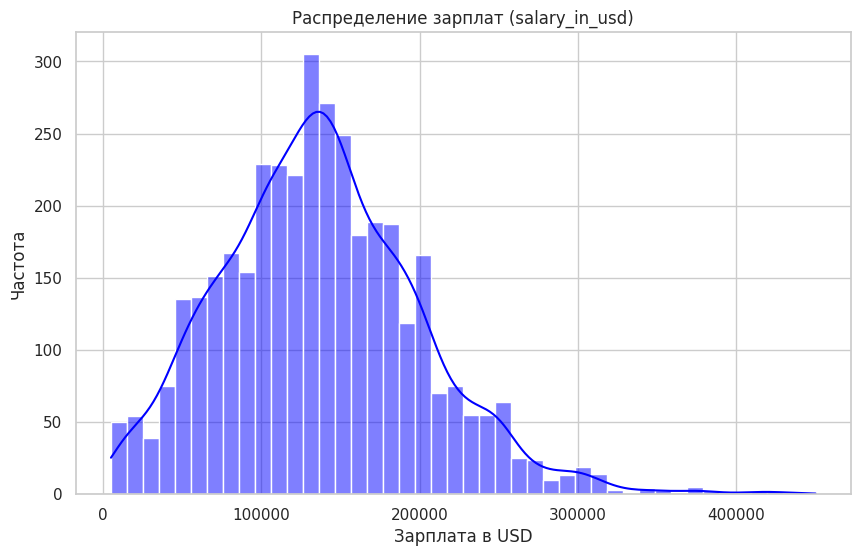

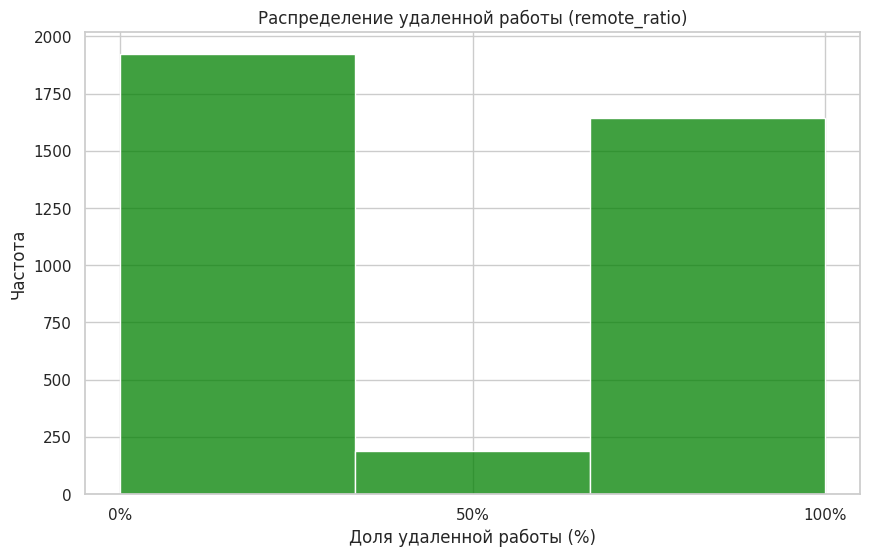

In [27]:
# Установка темы для картинок
sns.set(style='whitegrid')

# Визуализация распределения salary_in_usd
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='blue')
plt.title('Распределение зарплат (salary_in_usd)')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.show()

# Визуализация распределения remote_ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['remote_ratio'], bins=3, kde=False, color='green')  # bins соответствует количеству уникальных категорий
plt.title('Распределение удаленной работы (remote_ratio)')
plt.xlabel('Доля удаленной работы (%)')
plt.ylabel('Частота')
plt.xticks([0, 50, 100], ['0%', '50%', '100%'])  # Предполагаем, что remote_ratio использует шкалу 0-100
plt.show()

Описание распределения указывает на то, что данные по зарплате сконцентрированы, а по удаленности работы имеют два пика в 0% и 100%. Исходя из этого, можно предложить следующий подход:

1. Разделение на категории зарплат:
   - Низкая: зарплата ≤ 25-й перцентиль.
   - Средняя: зарплата > 25-й и ≤ 75-й перцентиль.
   - Высокая: зарплата > 75-й перцентиль.

2. Разделение на категории удаленной работы:
   - Без удаленной работы: 0%.
   - Частичная удаленная работа: больше 0% и меньше 100%.
   - Полная удаленная работа: 100%.

С учётом этих категорий, можно создать новый признак:

In [43]:
df_copy = df.copy()
# Устанавливаем границы для категоризации зарплат
salary_bins = [df['salary_in_usd'].min(),
               df['salary_in_usd'].quantile(0.25),
               df['salary_in_usd'].quantile(0.75),
               df['salary_in_usd'].max()]
salary_labels = ['Low', 'Medium', 'High']

df_copy['salary_category'] = pd.cut(df_copy['salary_in_usd'], bins=salary_bins, labels=salary_labels, include_lowest=True)

# Устанавливаем категории удаленной работы
df_copy['remote_category'] = pd.cut(df_copy['remote_ratio'], bins=[0, 1, 99, 100], right=False,
                               labels=['No remote', 'Partial remote', 'Full remote'])

# Создаем комбинированный признак
df_copy['work_conditions'] = df_copy['salary_category'].astype(str) + ' salary with ' + df_copy['remote_category'].astype(str)

df_copy.head()

,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size,ai,analyst,architect,...,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,salary_category,remote_category,work_conditions
0,2023,SE,Principal Data Scientist,85847,100,ES,L,0.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.0,0,3,Low,NaN,Low salary with nan
1,2023,MI,ML Engineer,30000,100,US,S,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,2,2,Low,NaN,Low salary with nan
2,2023,MI,ML Engineer,25500,100,US,S,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,2,2,Low,NaN,Low salary with nan
3,2023,SE,Data Scientist,175000,100,CA,M,0.0,0.0,0.0,...,0.0,0.0,0.0,0.864139,0.0,1,3,Medium,NaN,Medium salary with nan
4,2023,SE,Data Scientist,120000,100,CA,M,0.0,0.0,0.0,...,0.0,0.0,0.0,0.864139,0.0,1,3,Medium,NaN,Medium salary with nan


In [29]:
df_copy.work_conditions.value_counts()

,count
work_conditions,
Medium salary with No remote,1054
Medium salary with nan,769
High salary with No remote,495
Low salary with nan,448
High salary with nan,426
Low salary with No remote,374
Low salary with Partial remote,134
Medium salary with Partial remote,44
High salary with Partial remote,11


In [30]:
from sklearn.model_selection import train_test_split


X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   work_year                 3755 non-null   int64  
 1   salary_in_usd             3755 non-null   int64  
 2   remote_ratio              3755 non-null   int64  
 3   ai                        3755 non-null   float64
 4   analyst                   3755 non-null   float64
 5   architect                 3755 non-null   float64
 6   data                      3755 non-null   float64
 7   engineer                  3755 non-null   float64
 8   learning                  3755 non-null   float64
 9   machine                   3755 non-null   float64
 10  manager                   3755 non-null   float64
 11  other                     3755 non-null   float64
 12  research                  3755 non-null   float64
 13  scientist                 3755 non-null   float64
 14  speciali

## Отбор признаков

1. Посмотрим на матрицу корреляции

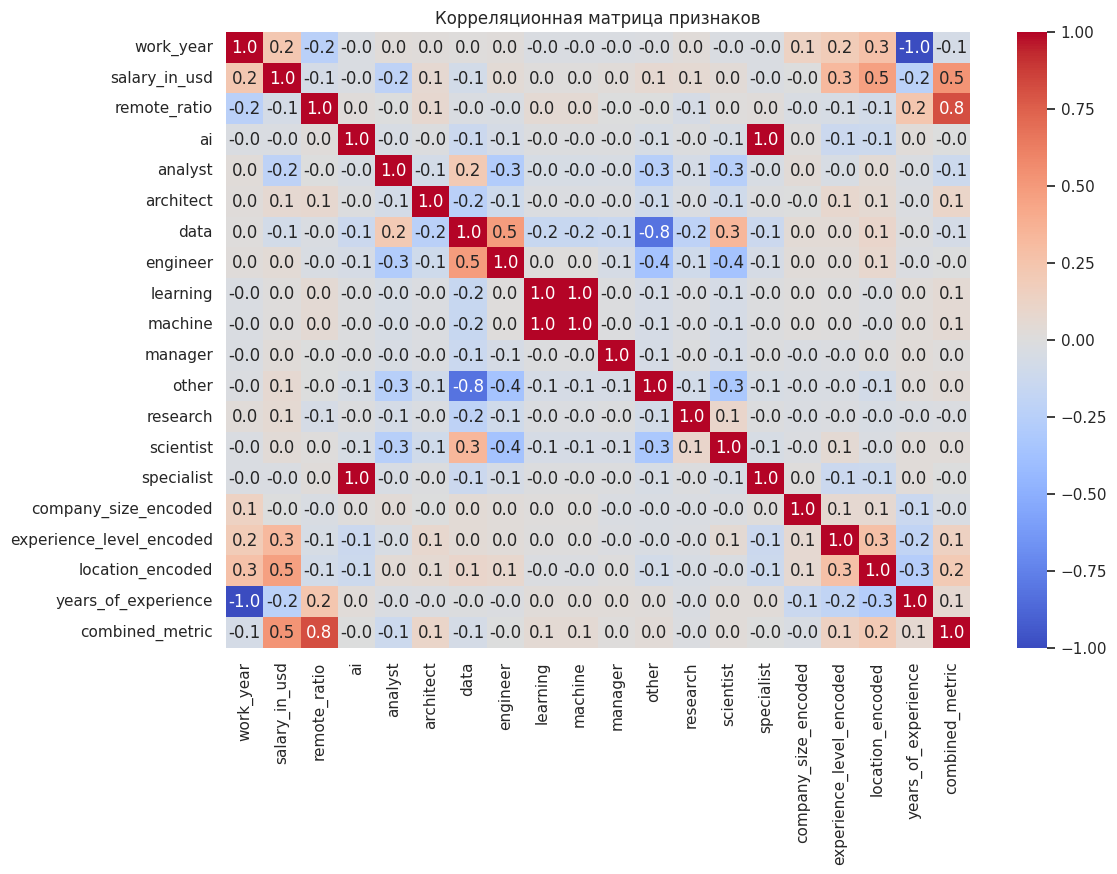

In [33]:
# Вычисляем корреляционную матрицу
correlation_matrix = df.corr()

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)

# Добавляем заголовок
plt.title("Корреляционная матрица признаков")
plt.show()

Сделай отбор признаков по пороговому значению

In [34]:
# Устанавливаем порог корреляции (например, 0.85)
correlation_threshold = 0.85

# Находим пары коррелирующих признаков
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Удаляем высоко коррелированные признаки из датафрейма
df_reduced_corr = df.drop(columns=correlated_features)
print(f"Признаки, удаленные из-за высокой корреляции: {correlated_features}")

Признаки, удаленные из-за высокой корреляции: {'years_of_experience', 'machine', 'specialist'}


На самом деле, признаки с низкой корреляцией могут быть неинформативными. Сделаем 2 пороговых значения

In [35]:
# Устанавливаем границы для отбора по корреляции
lower_threshold = 0.05  # Минимальная значимость корреляции
upper_threshold = 0.8   # Максимальная значимость корреляции

# Предполагаем, что "salary_in_usd" — это целевая переменная
target = "salary_in_usd"

# Корреляция всех признаков с целевой переменной
correlations = df.corr()[target]

# Оставляем только признаки, которые имеют корреляцию в заданных пределах
selected_features = correlations[correlations.abs().between(lower_threshold, upper_threshold)].index.tolist()

# Исключаем целевую переменную из списка признаков
selected_features = [feature for feature in selected_features if feature != target]

# Отобразим оставшиеся признаки
print("Оставшиеся признаки после отбора по корреляции:")
print(selected_features)

# Создаем новый датафрейм с выбранными признаками
df_selected = df[selected_features]

Оставшиеся признаки после отбора по корреляции:
['work_year', 'remote_ratio', 'analyst', 'architect', 'data', 'other', 'research', 'experience_level_encoded', 'location_encoded', 'years_of_experience', 'combined_metric']


Попробуем теперь методом обертки  
`SelectKBest` помогает выбрать наиболее информативные признаки на основе статистических методов.

In [36]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Разделение целевой переменной и признаков
X = df.drop(columns=["salary_in_usd"])  # Предполагаем, что "salary_in_usd" — целевая переменная
y = df["salary_in_usd"]

# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение SelectKBest
k = 10  # Число лучших признаков
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Получаем выбранные признаки
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

print(f"Выбранные признаки: {selected_features}")

Выбранные признаки: Index(['work_year', 'analyst', 'architect', 'data', 'other', 'research',
       'experience_level_encoded', 'location_encoded', 'years_of_experience',
       'combined_metric'],
      dtype='object')


Поэкспериментируйте с признаками, возможно вы сможете найти новые зависимости. Проверьте на отборе признаков, насколько информативными у вас получились признаки.